# Thermophysical properties of brine (H$_2$0 - NaCl) #

Calculate the thermophysical properties of H$_2$0 - NaCl mixtures.

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Density ##

Calculate the density of brine as a function of pressure, temperature and salt mole fraction.

Correlations from Drieser, *The system H$_2$0-NaCl. Part II: Correlations for molar volume, enthalpy, and isobaric heat capcacity from 0 to 1000C, 1 to 5000 bar, and 0 to 1 X$_{\mathrm{NaCl}}$*, Geochemica et Cosmochimica Acta 71, 4902-4919 (2007).

The specific volume of the H$_2$0-NaCl mixture is found from the specific volume of H$_2$0 with an effective temperature, $T_v = n_1 + n_2 T$.

The parameters $n_1$ and $n_2$ are defined as $n_1 = n_{10} + n_{11} (1-X_{\mathrm{NaCl}}) + n_{12} (1-X_{\mathrm{NaCl}})^2$, and $n_2 = n_{20} + n_{21} \sqrt{X_{\mathrm{NaCl}} + n_{22}} + n_{23} X_{\mathrm{NaCl}}$.

These parameters are given by Drieser (2007), and can be calculated as: (NOTE: the pressure is in bar)

In [14]:
def n11(p) :
    return -54.2958 - 45.7623 * np.exp(-9.44785e-4 * p)

def n21(p) :
    return -2.6142 - 0.000239092 * p

def n22(p) :
    return 0.0356828 + 4.37235e-6 * p + 2.0566e-9 * p * p

def n1x1(p) :
    return 330.47 + 0.942876 * np.sqrt(p) + 0.0817193 * p - 2.37556e-8 * p**2 + 3.45052e-10 * p**3

def n2x1(p) :
    return -0.0370751 + 0.00237723 * np.sqrt(p) + 5.42049e-5 * p + 5.84709e-9 * p**2 - 5.99373e-13 * p**3

def n12(p) :
    return -n1x1(p) - n11(p)

def n20(p) :
    return 1.0 - n21(p) * np.sqrt(n22(p))

def n23(p) :
    return n2x1(p) - n20(p) -  n21(p) * np.sqrt(1.0 + n22(p))


def n1(p, X) :
    return n1x1(p) + n11(p) * (1. - X) + n12(p) * (1.0 - X)**2

def n2(p, X) :
    return n20(p) + n21(p) * np.sqrt(X + n22(p)) + n23(p) * X

Plot of the parameters $n_1$ and $n_2$, which corresponds to Figure 4 in Drieser (2007).

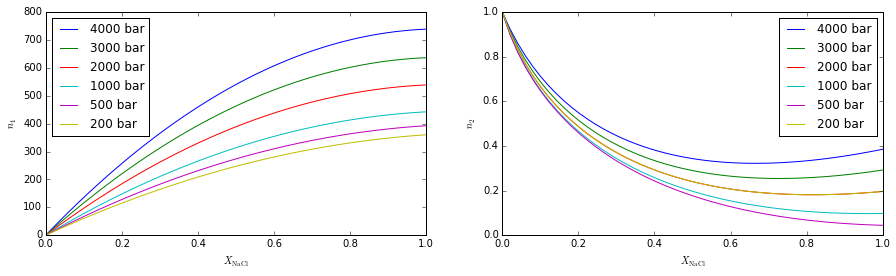

In [15]:
Xdata = np.linspace(0,1)

fig, axes = plt.subplots(1,2, figsize=(15,4))

axes[0].plot(Xdata, n1(4000,Xdata), label='4000 bar'); axes[1].plot(Xdata, n2(4000,Xdata), label='4000 bar');
axes[0].plot(Xdata, n1(3000,Xdata), label='3000 bar'); axes[1].plot(Xdata, n2(3000,Xdata), label='3000 bar');
axes[0].plot(Xdata, n1(2000,Xdata), label='2000 bar'); axes[1].plot(Xdata, n2(2000,Xdata), label='2000 bar');
axes[0].plot(Xdata, n1(1000,Xdata), label='1000 bar'); axes[1].plot(Xdata, n2(1000,Xdata), label='1000 bar');
axes[0].plot(Xdata, n1(500,Xdata), label='500 bar');  axes[1].plot(Xdata, n2(500,Xdata), label='500 bar');
axes[0].plot(Xdata, n1(200,Xdata), label='200 bar');  axes[1].plot(Xdata, n2(2000,Xdata), label='200 bar');
axes[0].set_xlabel('$X_{\mathrm{NaCl}}$'); axes[1].set_xlabel('$X_{\mathrm{NaCl}}$')
axes[0].set_ylabel('$n_1$'); axes[1].set_ylabel('$n_2$');
axes[0].legend(loc = 'upper left'); axes[1].legend()

The effective temperature is then

In [16]:
def Tv(p, t, X) :
    return n1(p, X) + n2(p, X) * t

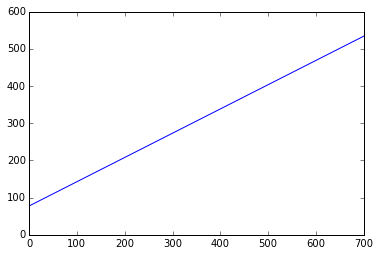

In [17]:
tdata = np.linspace(0,700)

plt.plot(tdata, Tv(1000, tdata, 0.1))

The above correlation can be used to get the molar volume of the brine. The brine density is then given by
\begin{equation}
\rho_b = \rho_{H_20} \frac{\sum_i x_i M_i}{M_{H_20}}
\end{equation}
where $x_i$ is the mass fraction of component $i$, and $M_i$ is the molar mass of component $i$, where $i$ refers to the salt or pure water components.

In [69]:
Mnacl = 58.443e-3
Mh2o = 18.015e-3

def Mbrine(X) :
    return X * Mnacl + (1.0 - X) * Mh2o

Converting from molality (mol/kg) to mass fraction (kg/kg)

In [19]:
def mol2mass(x) :
    return 1.0/(1. + 1./(x * Mnacl))

In [20]:
mol2mass(6)

0.2596201258941938

Density data from Pitzer et al. (Density is in g/cm^3, multiply by 1000 to get kg/m^3).

This data is for P = 200bar, t = 50C, and molality as specified.

In [38]:
moldata = np.array([0.1, 0.25, 0.5, 0.75, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0])

rhodata_p200_t50 = np.array([1.00045, 1.00622, 1.01564, 1.02487, 1.0339, 1.06852, 1.10087, 1.13123, 1.15982, 1.18682])

Read in MOOSE data for comparison.

In [83]:
moosedata = pd.read_csv('gold/BrineProperty_density_vpp_0001.csv')

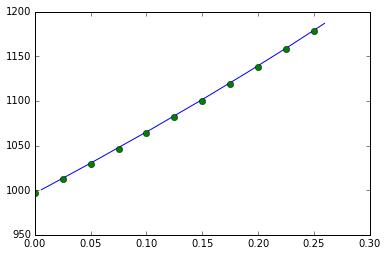

In [84]:
plt.plot(mol2mass(moldata), 1000*rhodata_p200_t50)
plt.plot(0.125*moosedata.x, moosedata.BrinePropertyAuxVariable, 'o')

In [82]:
Mnacl = 58.443e-3
Mh2o = 18.015e-3

# Average molar mass using mole fraction
def MX(X) :
    return X * Mnacl + (1.0 - X) * Mh2o

# Average molar mass using mass fraction
def Mx(x) :
    return 1/(x/Mnacl + (1.0-x)/Mh2o)

# Function to convert mole fraction (X) to mass fraction (x)
def molf2massf(X) :
    return X * Mnacl /(X * Mnacl + (1.0-X)*Mh2o)

Check the functions return the same quantity.

In [81]:
print MX(0.1)
print Mx(molf2massf(0.1))

0.0220578
0.0220578
